<a href="https://colab.research.google.com/github/karishma-18/1/blob/main/Another_copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

--- NumPy Basic Operations ---
Means: [5.84333333 3.05733333 3.758      1.19933333]
Medians: [5.8  3.   4.35 1.3 ]
Standard Deviations: [0.82530129 0.43441097 1.75940407 0.75969263]

First 5 rows of the dataset:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Normalized data (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

--- SciPy Statistical Analysis ---
T-test result for Sepal Length vs. mean=5: t=12.473, p=0.000
Pearson Correlation between Sepal Length and Sepal Width: r=-0.118, p=0.152

--- SciPy Optimization ---
Optimization result:
   mes

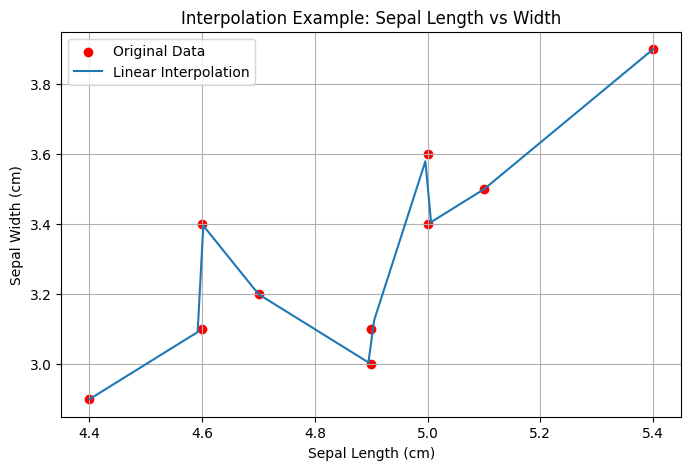

In [ ]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load a valid dataset - Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

print("Dataset shape:", X.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# NumPy Operations ------------------------------------------------------------

print("\n--- NumPy Basic Operations ---")

# Convert to NumPy array explicitly (optional here)
X_np = np.array(X)

# Compute mean, median, and standard deviation of each feature
means = np.mean(X_np, axis=0)
medians = np.median(X_np, axis=0)
std_devs = np.std(X_np, axis=0)

print("Means:", means)
print("Medians:", medians)
print("Standard Deviations:", std_devs)

# Slice and manipulate arrays
first_five = X_np[:5, :]
print("\nFirst 5 rows of the dataset:\n", first_five)

# Broadcasting: normalize data
normalized_data = (X_np - means) / std_devs
print("\nNormalized data (first 5 rows):\n", normalized_data[:5])

# SciPy Statistical Operations ------------------------------------------------

print("\n--- SciPy Statistical Analysis ---")

# One-sample t-test: is the mean of the first feature significantly different from 5?
t_stat, p_val = stats.ttest_1samp(X_np[:, 0], popmean=5)
print(f"T-test result for Sepal Length vs. mean=5: t={t_stat:.3f}, p={p_val:.3f}")

# Pearson correlation between Sepal Length and Sepal Width
corr, p_corr = stats.pearsonr(X_np[:, 0], X_np[:, 1])
print(f"Pearson Correlation between Sepal Length and Sepal Width: r={corr:.3f}, p={p_corr:.3f}")

# SciPy Optimization ---------------------------------------------------------

print("\n--- SciPy Optimization ---")

# Define a simple quadratic function and find its minimum
def func_to_minimize(x):
    return (x - 3)**2 + 2

result = optimize.minimize(func_to_minimize, x0=0)
print("Optimization result:\n", result)

# SciPy Interpolation --------------------------------------------------------

print("\n--- SciPy Interpolation ---")

# Interpolate sepal length vs sepal width for first 10 samples
x_vals = X_np[:10, 0]  # Sepal Length
y_vals = X_np[:10, 1]  # Sepal Width

# Create linear interpolator
linear_interp = interpolate.interp1d(x_vals, y_vals, kind='linear', fill_value='extrapolate')

# Generate new x values and interpolate
x_new = np.linspace(min(x_vals), max(x_vals), 100)
y_new = linear_interp(x_new)

# Plot original and interpolated points
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color='red', label='Original Data')
plt.plot(x_new, y_new, label='Linear Interpolation')
plt.title('Interpolation Example: Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


--- Data Preview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

--- Summary Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000       

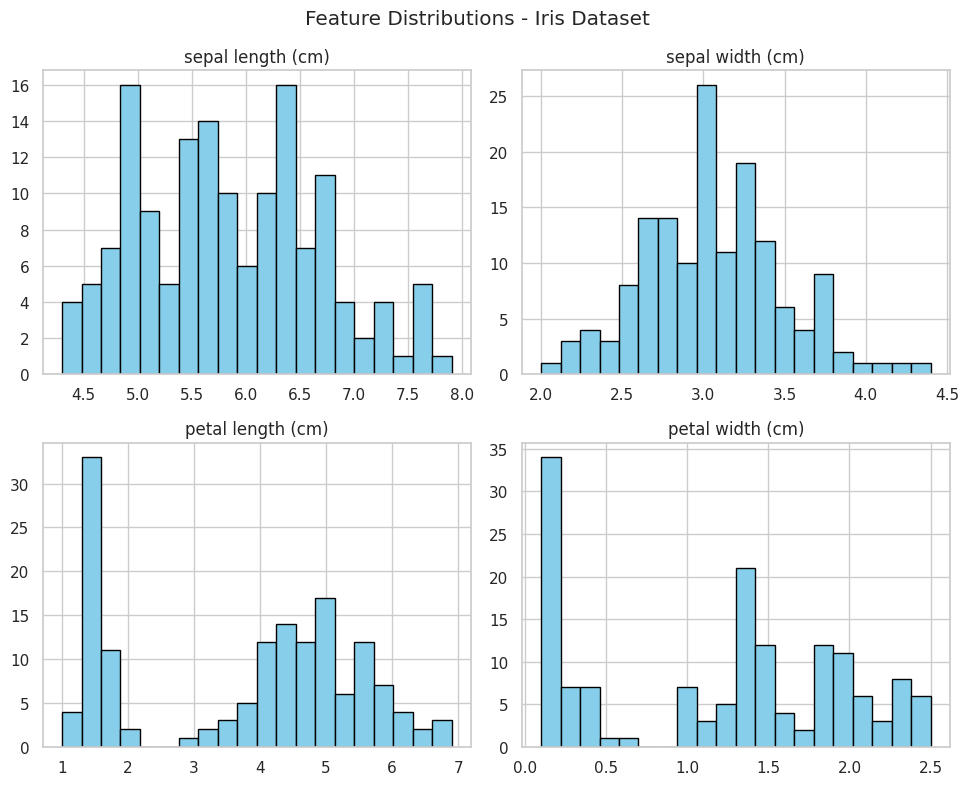

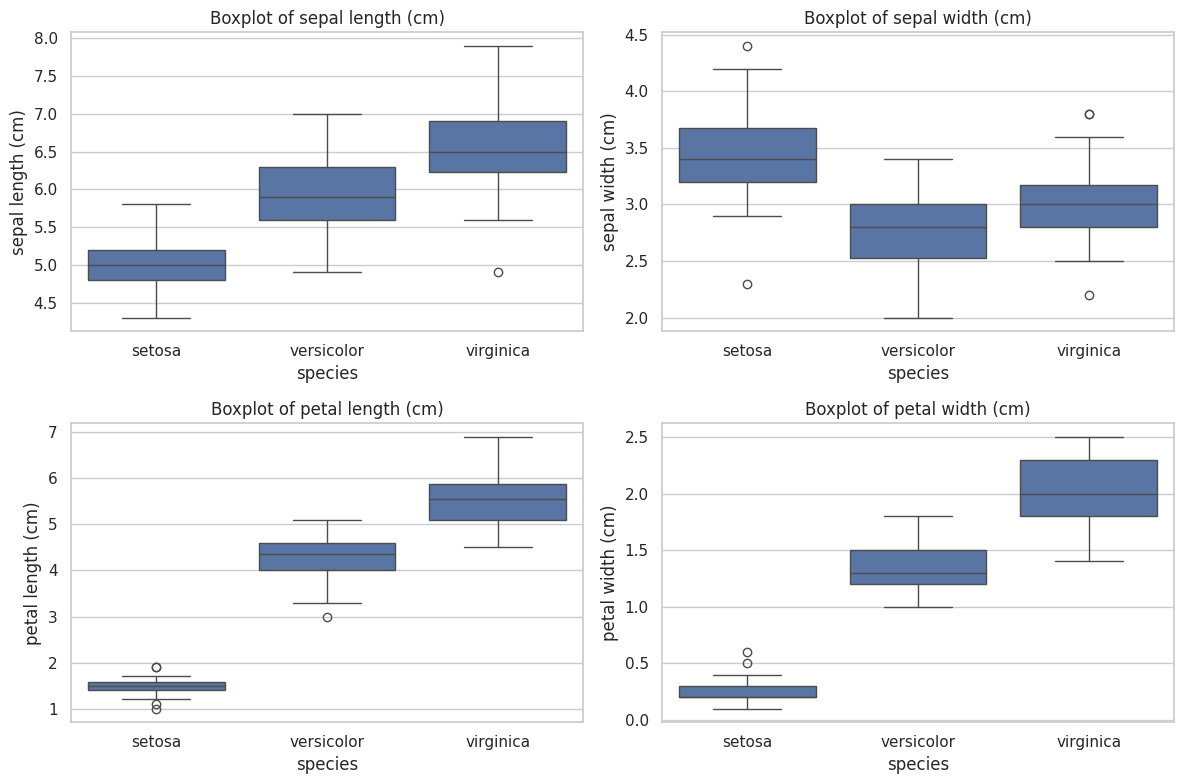

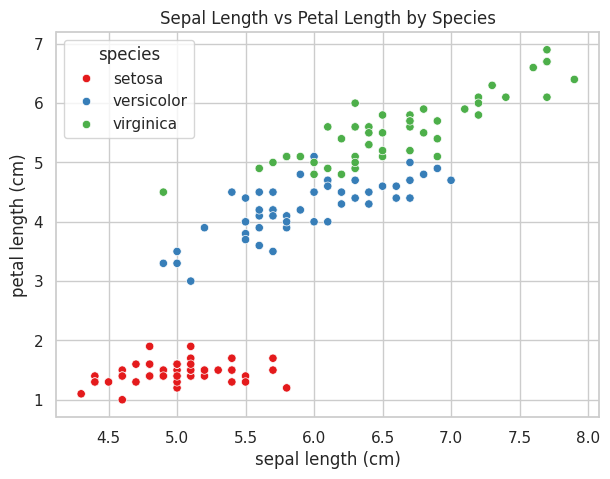

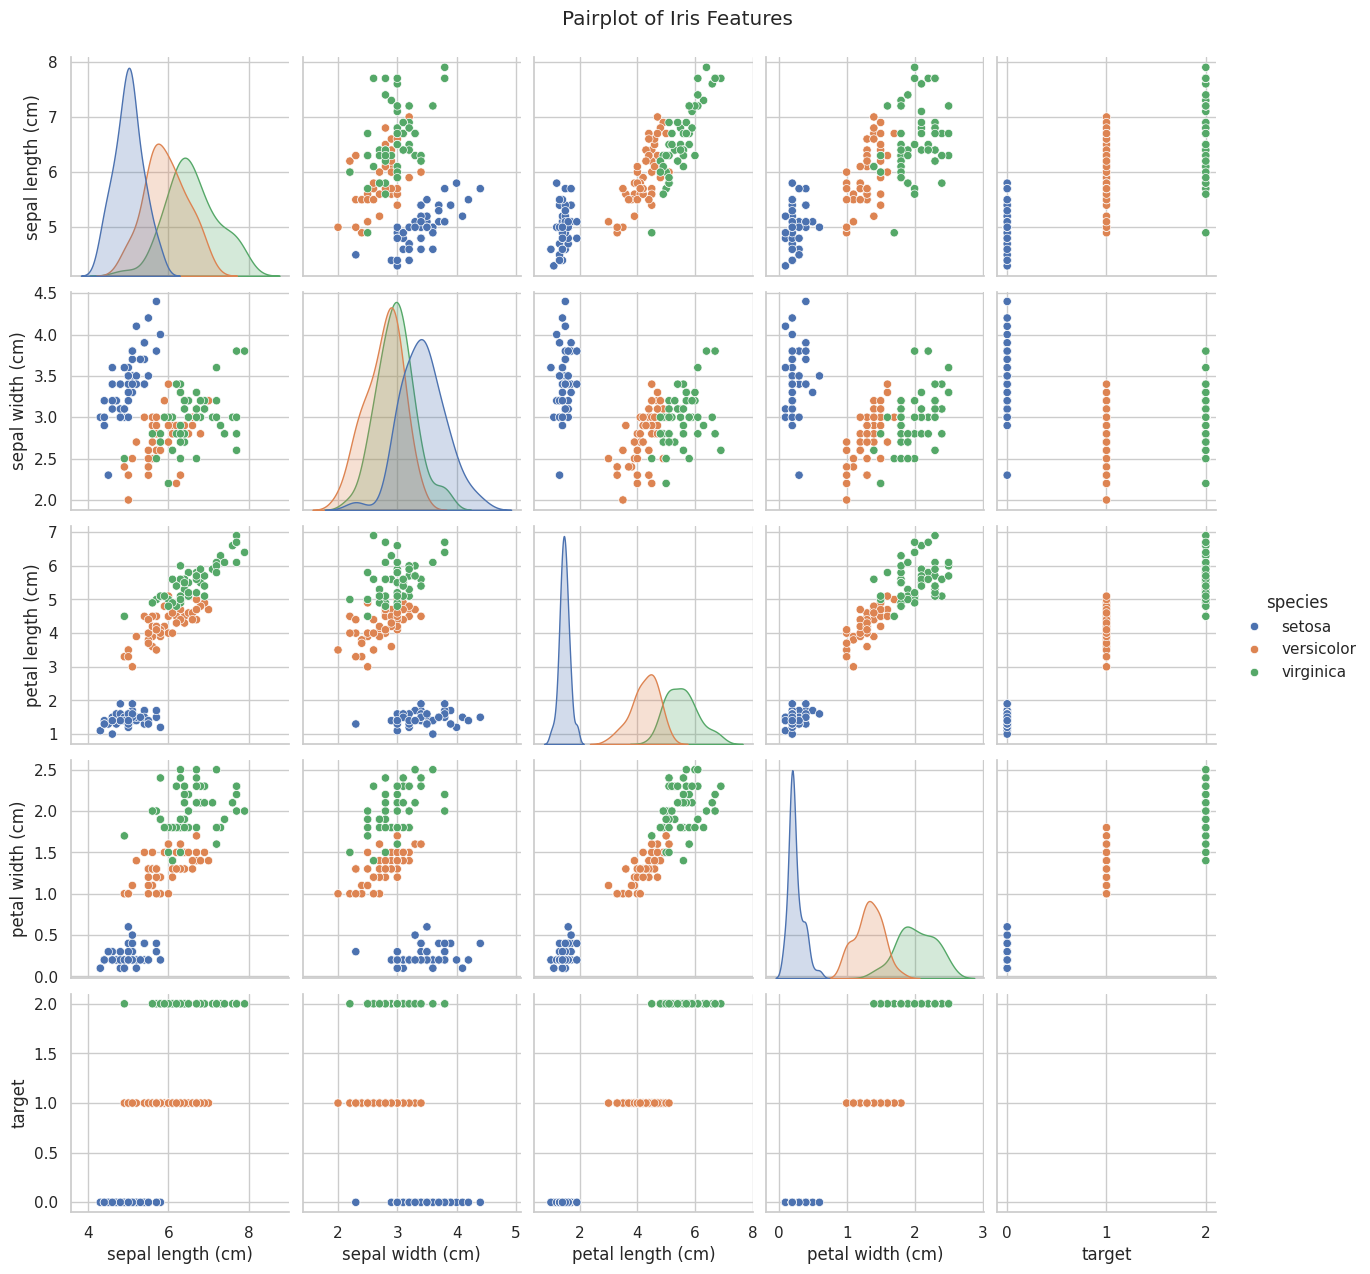

In [ ]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris dataset from sklearn
iris = load_iris()

# Create a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Display the first few rows of the DataFrame
print("--- Data Preview ---")
print(df.head())

# Summary statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Grouping and aggregation
print("\n--- Mean Features by Species ---")
print(df.groupby('species').mean())

# Data Filtering Example: Get rows where petal length > 5
print("\n--- Filtered Data (petal length > 5) ---")
print(df[df['petal length (cm)'] > 5])

# -----------------------------------------------
# Visualization with Matplotlib and Seaborn
# -----------------------------------------------

print("\n--- Generating Visualizations ---")

# Set style for better aesthetics
sns.set(style='whitegrid')

# 1. Histogram for all features
df.iloc[:, :-2].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Iris Dataset")
plt.tight_layout()
plt.show()

# 2. Boxplot for each feature grouped by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 3. Scatter plot (Sepal Length vs Petal Length)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df, palette='Set1')
plt.title("Sepal Length vs Petal Length by Species")
plt.grid(True)
plt.show()

# 4. Pair Plot (scatter matrix for all features)
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names

# Convert the dataset to a DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y

print("--- Dataset Preview ---")
print(df.head())

# For simplicity, we will use 'RM' (average number of rooms per dwelling) as the feature
X_rm = df[['RM']].values  # Independent variable (reshape to 2D for a single feature)
y_price = df['Price'].values  # Dependent variable (target)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_rm, y_price, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values (prices) for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results (predictions vs actual values)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: RM vs Price')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Price')
plt.legend()
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Convert the dataset to a DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y

print("--- Dataset Preview ---")
print(df.head())

# For simplicity, we will use 'AveRooms' (average number of rooms) as the feature
X_rooms = df[['AveRooms']].values  # Independent variable (reshape to 2D for a single feature)
y_price = df['Price'].values  # Dependent variable (target)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y_price, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values (prices) for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results (predictions vs actual values)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: AveRooms vs Price')
plt.xlabel('Average Number of Rooms (


SyntaxError: unterminated string literal (detected at line 50) (<ipython-input-4-b55cc70ce0fc>, line 50)

--- Dataset Preview ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

--- Model Evaluation ---
Mean Squared Error: 1.2923314440807299
R-squared: 0.013795337532284901


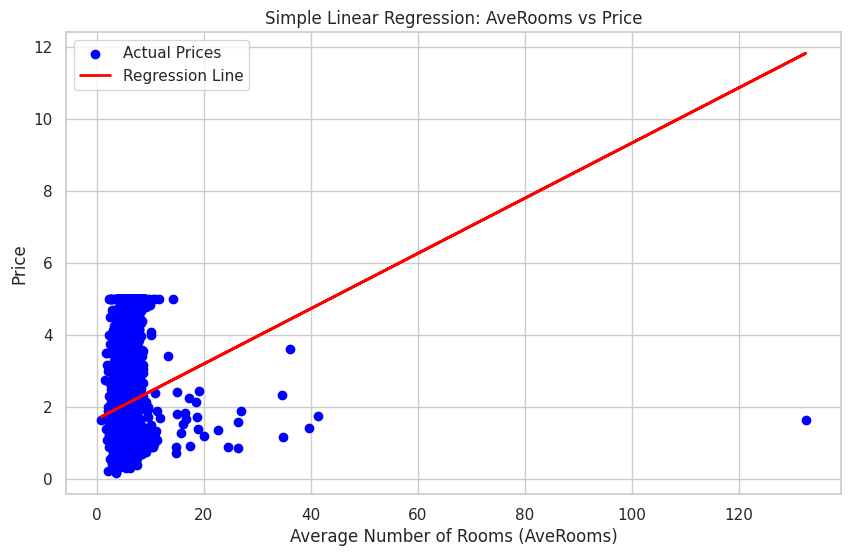

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Convert the dataset to a DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y

print("--- Dataset Preview ---")
print(df.head())

# For simplicity, we will use 'AveRooms' (average number of rooms) as the feature
X_rooms = df[['AveRooms']].values  # Independent variable (reshape to 2D for a single feature)
y_price = df['Price'].values  # Dependent variable (target)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y_price, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values (prices) for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results (predictions vs actual values)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: AveRooms vs Price')
plt.xlabel('Average Number of Rooms (AveRooms)')
plt.ylabel('Price')
plt.legend()
plt.show()


--- Dataset Preview ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- Model Evaluation ---
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
Mean Squared Error (MSE): 0.5558915986952444
R² Score: 0.5757877060324508


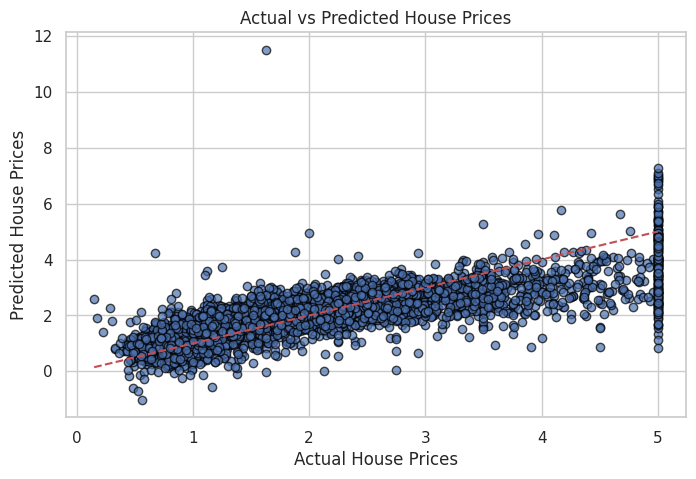

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Convert to pandas DataFrame

# Display the first few rows
print("--- Dataset Preview ---")
print(df.head())

# Features and Target
X = df.drop('MedHouseVal', axis=1)  # All columns except the target
y = df['MedHouseVal']               # Median house value

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluation
print("\n--- Model Evaluation ---")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot predicted vs actual prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, edgecolor='black', alpha=0.7)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.grid(True)
plt.show()


--- Dataset Preview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

--- Evaluation Metrics ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00    

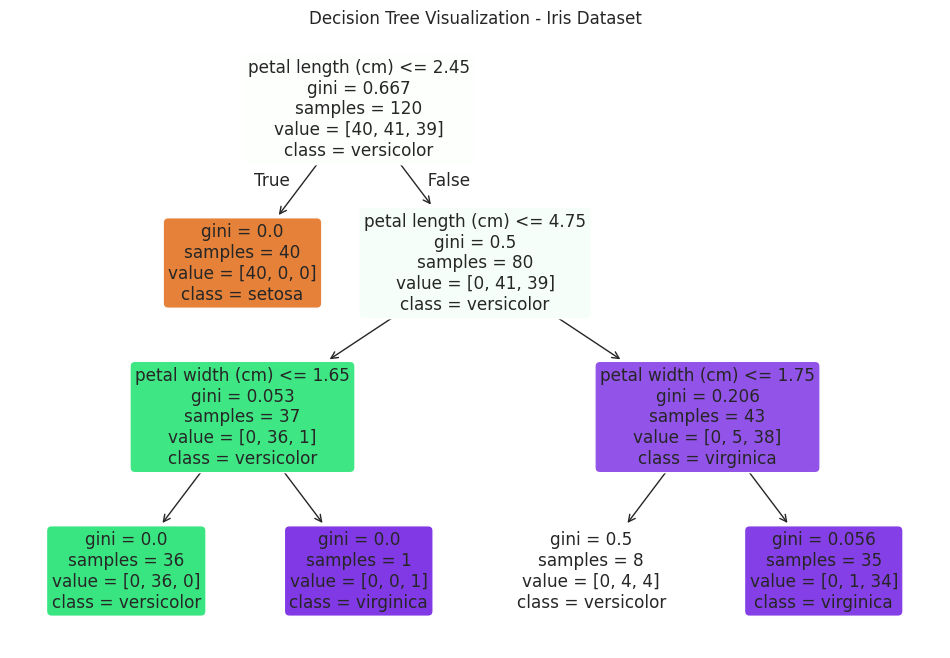

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("--- Dataset Preview ---")
print(df.head())

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()


--- Dataset Preview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

--- Evaluation Metrics ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00    

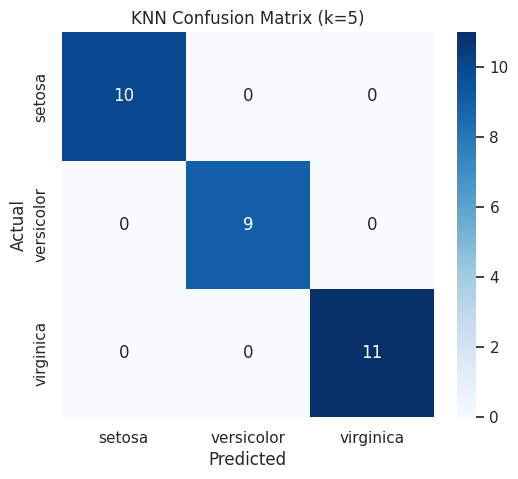

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("--- Dataset Preview ---")
print(df.head())

# Split the dataset (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN classifier (you can tune k)
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.title(f"KNN Confusion Matrix (k={k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Dataset Preview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

--- Model Evaluation ---
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97 

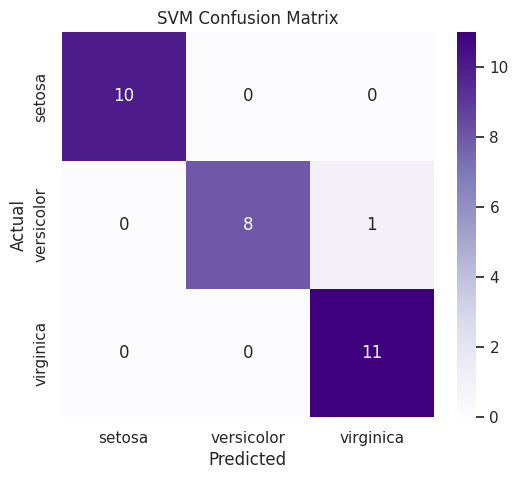

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame (for better readability)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("--- Dataset Preview ---")
print(df.head())

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)  # You can try 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Dataset Preview ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wors

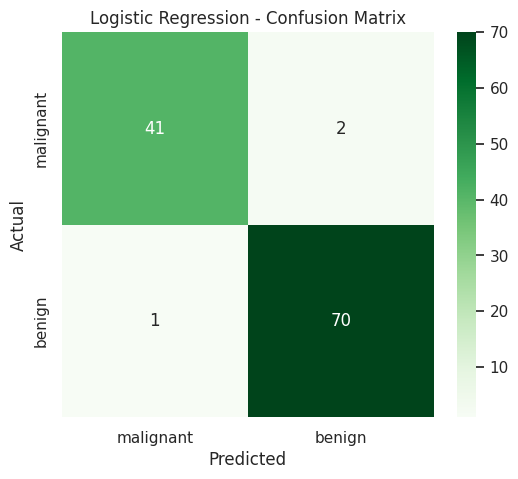

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Convert to DataFrame for better visibility
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("--- Dataset Preview ---")
print(df.head())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Dataset Preview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Silhouette Score: 0.551191604619592


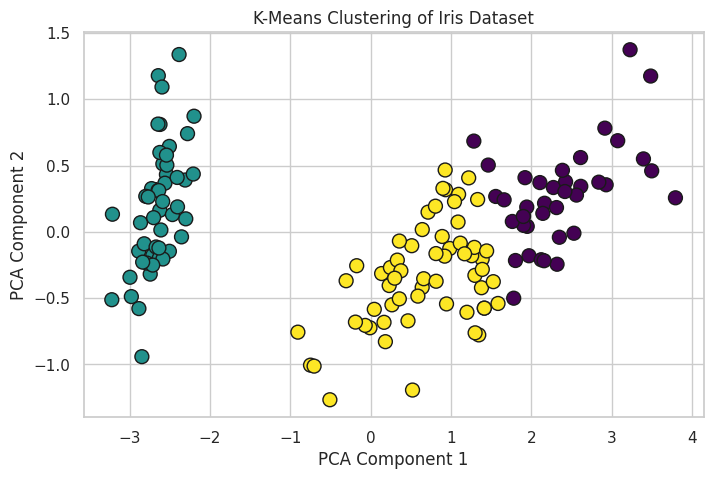

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)

print("--- Dataset Preview ---")
print(df.head())

# Apply KMeans clustering
k = 3  # Number of clusters (Iris has 3 actual species)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Cluster labels
labels = kmeans.labels_
df['Cluster'] = labels

# Evaluate clustering using Silhouette Score
score = silhouette_score(X, labels)
print("\nSilhouette Score:", score)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=100)
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalize the input features (important for neural networks)
X_train = X_train / X_train.max(axis=0)
X_test = X_test / X_test.max(axis=0)

# Set up parameters
input_layer_size = X_train.shape[1]  # 4 features in the Iris dataset
hidden_layer_size = 5  # Number of neurons in the hidden layer
output_layer_size = y_train.shape[1]  # 3 output classes in Iris dataset
learning_rate = 0.01
epochs = 10000

# Initialize weights and biases for the hidden and output layers
np.random.seed(42)
W1 = np.random.randn(input_layer_size, hidden_layer_size)  # Weight matrix for input to hidden
b1 = np.zeros((1, hidden_layer_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_layer_size, output_layer_size)  # Weight matrix for hidden to output
b2 = np.zeros((1, output_layer_size))  # Bias for output layer

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Output layer activation (sigmoid for binary classification)
    return A1, A2

# Backpropagation
def backpropagation(X, y, A1, A2):
    global W1, b1, W2, b2
    m = X.shape[0]

    # Output layer error
    dA2 = A2 - y
    dZ2 = dA2 * sigmoid_derivative(A2)

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)

    # Gradients for weights and biases
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training the network
losses = []
for epoch in range(epochs):
    # Forward pass
    A1, A2 = forward_propagation(X_train)

    # Calculate loss (Cross-Entropy Loss)
    loss = -np.mean(np.sum(y_train * np.log(A2 + 1e-7), axis=1))
    losses.append(loss)

    # Backpropagation
    backpropagation(X_train, y_train, A1, A2)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the loss over epochs
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions
def predict(X):
    _, A2 = forward_propagation(X)
    return np.argmax(A2, axis=1)

# Evaluate the model on the test set
y_pred = predict(X_test)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_true)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

Epoch 0, Loss: 12.386623237827152
Epoch 1000, Loss: 0.5727267100530311
Epoch 2000, Loss: 0.46739911284225666
Epoch 3000, Loss: 0.4476664173819743
Epoch 4000, Loss: 0.4378842345228613
Epoch 5000, Loss: 0.4317701023075942
Epoch 6000, Loss: 0.42739468389977964
Epoch 7000, Loss: 0.42405301882127955
Epoch 8000, Loss: 0.4213875443476537
Epoch 9000, Loss: 0.41918469990963597


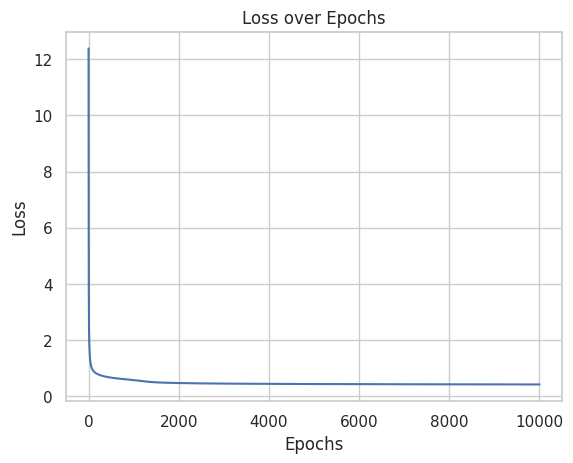

Mean Squared Error on Test Set: 0.43451035792698706
R-squared on Test Set: 0.6684162233760973


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameters
input_layer_size = X_train.shape[1]  # 8 features
hidden_layer_size = 10  # Hidden layer with 10 neurons
output_layer_size = 1  # Single output (regression problem)
learning_rate = 0.01
epochs = 10000

# Initialize weights and biases for the hidden and output layers
np.random.seed(42)
W1 = np.random.randn(input_layer_size, hidden_layer_size)  # Weight matrix for input to hidden
b1 = np.zeros((1, hidden_layer_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_layer_size, output_layer_size)  # Weight matrix for hidden to output
b2 = np.zeros((1, output_layer_size))  # Bias for output layer

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # ReLU activation for the hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Linear output (no activation function for regression)
    return A1, A2

# Backpropagation
def backpropagation(X, y, A1, A2):
    global W1, b1, W2, b2
    m = X.shape[0]

    # Output layer error (for regression)
    dA2 = A2 - y.reshape(-1, 1)  # Reshaping y to be a column vector
    dZ2 = dA2  # Derivative of linear function (no activation)

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)

    # Gradients for weights and biases
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training the model
losses = []
for epoch in range(epochs):
    # Forward pass
    A1, A2 = forward_propagation(X_train)

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y_train.reshape(-1, 1) - A2) ** 2)  # MSE for regression
    losses.append(loss)

    # Backpropagation
    backpropagation(X_train, y_train, A1, A2)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the loss over epochs
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions
def predict(X):
    _, A2 = forward_propagation(X)
    return A2

# Evaluate the model on the test set
y_pred = predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = np.mean((y_test - y_pred.flatten()) ** 2)
r2 = 1 - (np.sum((y_test - y_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")
